# Подбор метода масштабирования признаков

In [1]:
from python_files.data import data
from python_files.full_col_list import full_col_list

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [4]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

#### Смотрим еще раз на признаки для оценки необходимости масштабирования

In [5]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


#### Вывод: максимальные значения у признаков: Плотность, кг/м3', 'модуль упругости, ГПа', 'Прочность при растяжении, МПа', 'Поверхностная плотность, г/м2' равны 2207, 1912, 3848 и 1400 соответсвенно, а у признаков: 'Соотношение матрица-наполнитель', 'Содержание эпоксидных групп,%_2', 'Шаг нашивки' - 6, 33 и  14. Попробуем масштабировать и сравнить есть ли выигрыш в точности в сравнении с оригинальным масштабом данных в зависимости от выбранных моделей.

In [5]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns = full_col_list)
    return res

In [6]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    # первый график
    plt.subplot(2, 1, 1)
    plt.title(label1)
    f = sns.kdeplot(data=df1[col_list])
    sns.move_legend(f, "center left", bbox_to_anchor=(1, .5)) 
    # второй график
    plt.subplot(2, 1, 2)
    plt.title(label2)
    g = sns.kdeplot(data=df2[col_list])
    sns.move_legend(g, "center left", bbox_to_anchor=(1, .5)) 
    plt.show()

### Масштабирование данных на основе Z-оценки (StandardScaler)

Особенности метода:

- Среднее значение приводится к 0.
- Среднеквадратичное отклонение приводится к 1.
- Форма исходного распределения сохраняется.
- Максимальные и минимальные значения могут варьироваться.
- Выбросы сохраняются.

Метод реализован с использованием класса StandardScaler.

In [7]:
data_ = data.copy()
# Обучаем StandardScaler и масштабируем
data_std_scaled_temp = StandardScaler().fit_transform(data_)
# формируем DataFrame на основе массива
data_std_scaled = arr_to_df(data_std_scaled_temp)
data_std_scaled.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03
mean,-2.170524e-17,8.612639e-16,3.229740e-16,-6.424751e-17,-5.035616e-17,4.584147e-16,7.640244e-17,-1.093944e-16,7.779158e-16,-2.786953e-16,2.778271e-16,-3.142919e-16,9.723948e-17
std,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00
min,-2.783776e+00,-3.310622e+00,-2.234332e+00,-3.282308e+00,-3.321825e+00,-4.542215e+00,-1.714677e+00,-2.975023e+00,-2.946217e+00,-3.092116e+00,-9.835180e-01,-2.692680e+00,-4.629749e+00
25%,-6.710072e-01,-6.999212e-01,-7.267418e-01,-6.409455e-01,-6.803619e-01,-6.552663e-01,-7.678973e-01,-6.683499e-01,-6.820742e-01,-6.497697e-01,-9.835180e-01,-7.100068e-01,-5.957682e-01
50%,-2.573263e-02,2.560303e-02,-7.843941e-04,-2.096293e-04,-5.673631e-03,3.582556e-04,-1.097794e-01,-1.917160e-02,-1.524199e-02,1.299248e-02,-9.835180e-01,6.604358e-03,1.522815e-02
75%,6.817601e-01,6.193176e-01,6.722489e-01,6.774466e-01,7.141185e-01,6.627029e-01,7.486141e-01,6.505431e-01,6.186158e-01,6.541739e-01,1.016758e+00,6.584426e-01,6.311118e-01
max,2.915695e+00,3.148712e+00,3.549589e+00,3.125033e+00,4.471955e+00,3.112932e+00,3.260615e+00,3.000355e+00,2.846190e+00,3.285517e+00,1.016758e+00,2.943275e+00,3.793863e+00


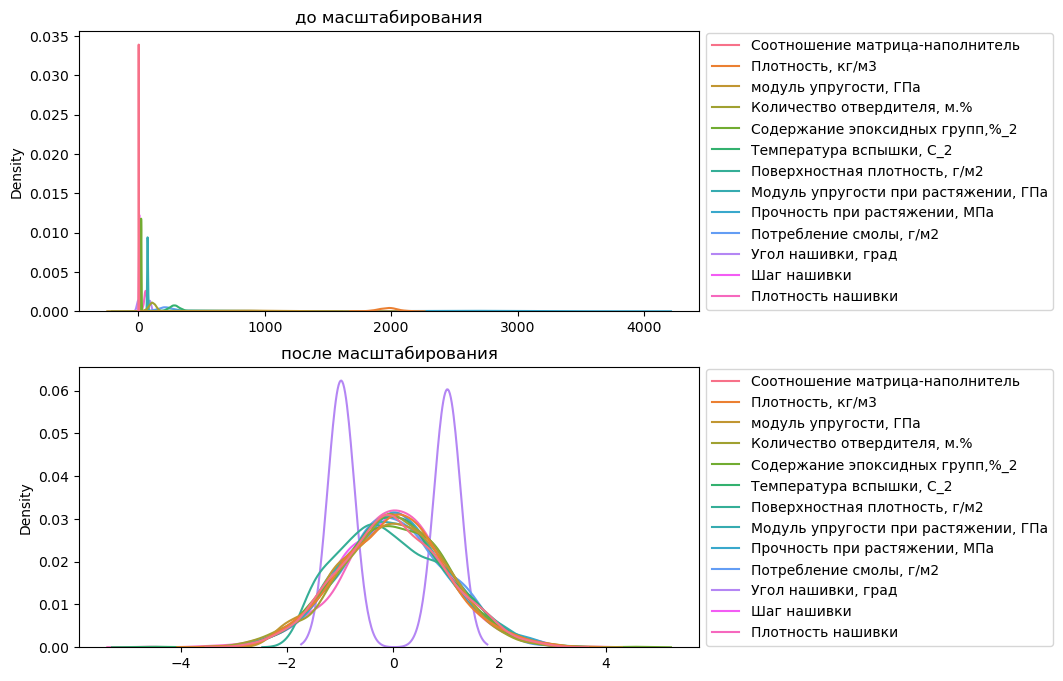

In [8]:
draw_kde(full_col_list, data_, data_std_scaled, 'до масштабирования', 'после масштабирования')

### Масштабирование "Mean Normalisation"

Особенности метода:

- Среднее значение приводится к 0.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [-1;1].
- Выбросы сохраняются.

Нет стандартного класса, возможна реализация с использованием Pandas.

In [9]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = data_.mean(axis=0)
        maxs = data_.max(axis=0)
        mins = data_.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [10]:
data_ = data.copy()
# Обучаем MeanNormalisation и масштабируем
data_mean_scaled_temp = MeanNormalisation().fit_transform(data_)
# формируем DataFrame на основе массива
data_mean_scaled = arr_to_df(data_mean_scaled_temp)
data_mean_scaled.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03
mean,-3.689891e-18,1.328361e-16,5.990646e-17,-9.550306e-18,-6.403046e-18,6.099172e-17,1.606188e-17,-1.910061e-17,1.354407e-16,-4.373606e-17,2.778271e-17,-5.773594e-17,1.041852e-17
std,1.755407e-01,1.548905e-01,1.729777e-01,1.561473e-01,1.283702e-01,1.306950e-01,2.010915e-01,1.674353e-01,1.727242e-01,1.568747e-01,5.001755e-01,1.775190e-01,1.187720e-01
min,-4.884271e-01,-5.125330e-01,-3.863006e-01,-5.122730e-01,-4.262149e-01,-5.933544e-01,-3.446385e-01,-4.978804e-01,-5.086344e-01,-4.848375e-01,-4.916911e-01,-4.777682e-01,-5.496157e-01
25%,-1.177315e-01,-1.083581e-01,-1.256486e-01,-1.000330e-01,-8.729549e-02,-8.559815e-02,-1.543421e-01,-1.118507e-01,-1.177531e-01,-1.018826e-01,-4.916911e-01,-1.259781e-01,-7.072598e-02
50%,-4.514916e-03,3.963726e-03,-1.356163e-04,-3.271705e-05,-7.279691e-04,4.679931e-05,-2.206492e-02,-3.208433e-03,-2.631373e-03,2.037195e-03,-4.916911e-01,1.171826e-03,1.807793e-03
75%,1.196181e-01,9.587949e-02,1.162272e-01,1.057297e-01,9.162672e-02,8.656960e-02,1.504663e-01,1.088706e-01,1.067977e-01,1.025731e-01,5.083089e-01,1.168289e-01,7.492176e-02
max,5.115729e-01,4.874670e-01,6.136994e-01,4.877270e-01,5.737851e-01,4.066456e-01,6.553615e-01,5.021196e-01,4.913656e-01,5.151625e-01,5.083089e-01,5.222318e-01,4.503843e-01


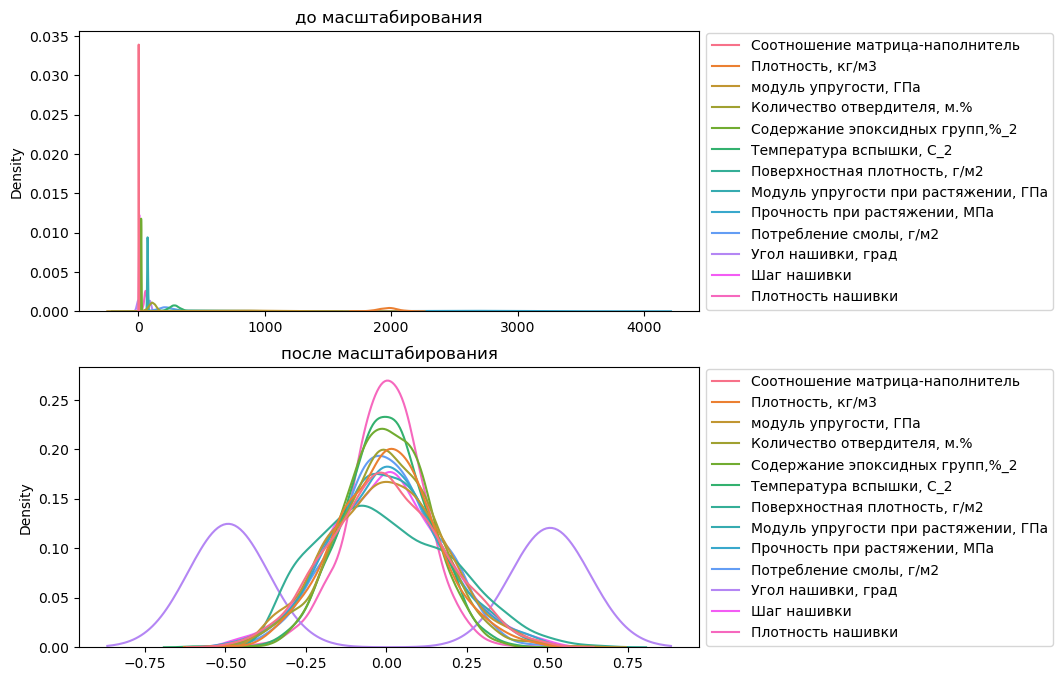

In [11]:
draw_kde(full_col_list, data_, data_mean_scaled, 'до масштабирования', 'после масштабирования')

### MinMax-масштабирование (MinMaxScaler)

Особенности метода:

- Среднее значение может варьироваться.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [0;1].
- Выбросы сохраняются.

Метод реализован с использованием класса MinMaxScaler.

In [12]:
data_ = data.copy()
# Обучаем MinMaxScaler и масштабируем
data_minmax_scaled_temp = MinMaxScaler().fit_transform(data_)
# формируем DataFrame на основе массива
data_minmax_scaled = arr_to_df(data_minmax_scaled_temp)
data_minmax_scaled.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.488427,0.512533,0.386301,0.512273,0.426215,0.593354,0.344638,0.497880,0.508634,0.484838,0.491691,0.477768,0.549616
std,0.175541,0.154890,0.172978,0.156147,0.128370,0.130695,0.201092,0.167435,0.172724,0.156875,0.500175,0.177519,0.118772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370696,0.404175,0.260652,0.412240,0.338919,0.507756,0.190296,0.386030,0.390881,0.382955,0.000000,0.351790,0.478890
50%,0.483912,0.516497,0.386165,0.512240,0.425487,0.593401,0.322574,0.494672,0.506003,0.486875,0.000000,0.478940,0.551423
75%,0.608045,0.608413,0.502528,0.618003,0.517842,0.679924,0.495105,0.606751,0.615432,0.587411,1.000000,0.594597,0.624537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


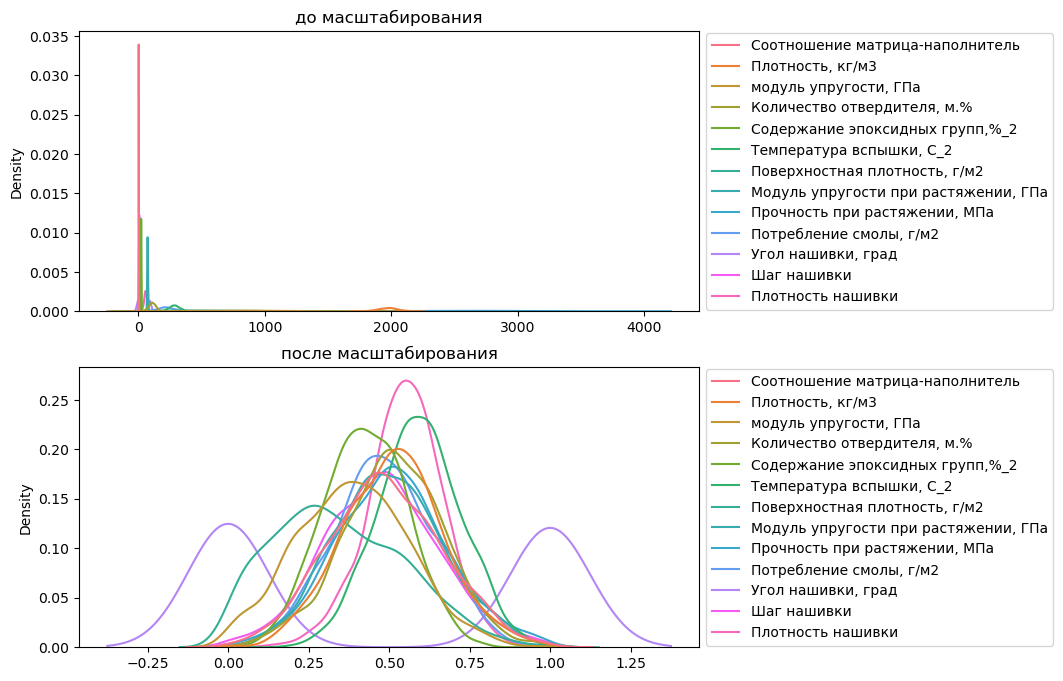

In [13]:
draw_kde(full_col_list, data_, data_minmax_scaled, 'до масштабирования', 'после масштабирования')

### Масштабирование по медиане (RobustScaler)

Особенности метода:

- Медиана приводится к 0.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения могут варьироваться.
- Устраняются выбросы.

Метод реализован с использованием класса RobustScaler.

In [14]:
data_ = data.copy()
# Обучаем RobustScaler и масштабируем
data_robust_scaled_temp = RobustScaler().fit_transform(data_)
# формируем DataFrame на основе массива
data_robust_scaled = arr_to_df(data_robust_scaled_temp)
data_robust_scaled.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.019022,-0.019407,0.000561,0.000159,0.004069,-0.000272,0.072389,0.014536,0.011718,-0.009964,0.491691,-0.004826,-0.012412
std,0.739587,0.758384,0.715151,0.758871,0.717464,0.759114,0.659731,0.758582,0.769199,0.767279,0.500175,0.731112,0.815474
min,-2.038816,-2.528901,-1.596542,-2.489471,-2.378055,-3.446645,-1.058283,-2.241161,-2.253401,-2.381321,0.000000,-1.972513,-3.786008
25%,-0.477003,-0.549957,-0.518915,-0.485998,-0.483828,-0.497451,-0.433968,-0.492215,-0.512676,-0.508275,0.000000,-0.523667,-0.498008
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.522997,0.450043,0.481085,0.514002,0.516172,0.502549,0.566032,0.507785,0.487324,0.491725,1.000000,0.476333,0.501992
max,2.174378,2.367357,2.537810,2.370496,3.210966,2.361643,2.222466,2.289440,2.199934,2.509713,1.000000,2.145984,3.079873


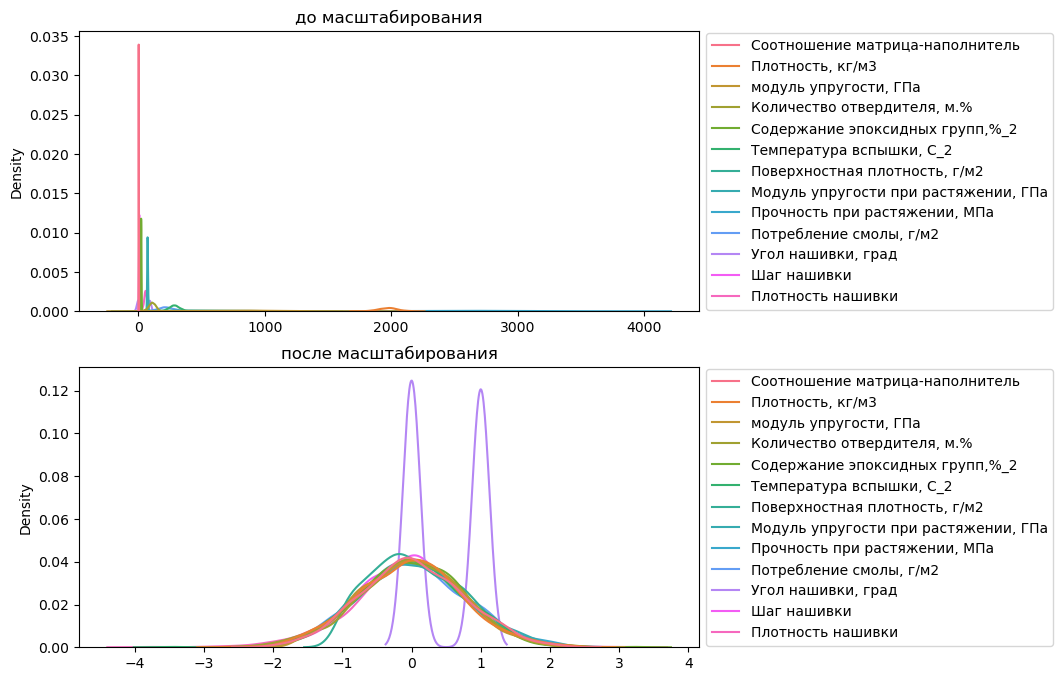

In [15]:
draw_kde(full_col_list, data_, data_robust_scaled, 'до масштабирования', 'после масштабирования')

### Масштабирование по максимальному значению (MaxAbsScaler)

Особенности метода:

- Среднее значение НЕ ЦЕНТРИРУЕТСЯ. Предполагается что оно уже отцентрировано исходя их характера данных.
- Среднеквадратичное отклонение не масштабируется.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [-1;1].

Метод реализован с использованием класса MaxAbsScaler.

Для центрирования распределения возможна комбинация с другими методами, например со StandardScaler.

In [16]:
data_ = data.copy()

# Центрирование с помощью StandardScaler и затем обработка MaxAbsScaler
abs_sc = MaxAbsScaler()
std_sc = StandardScaler(with_mean=True, with_std=False)

abs_sc.fit(data_.values)
std_sc.fit(data_.values)

data_abs_scaled_temp = abs_sc.transform(std_sc.transform(data_.values))

# формируем DataFrame на основе массива
data_abs_scaled = arr_to_df(data_abs_scaled_temp)
data_abs_scaled.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03
mean,-2.604629e-18,2.821681e-17,5.947236e-17,-8.247991e-18,-4.178259e-18,4.710037e-17,1.562777e-17,-3.689891e-18,9.810768e-17,-3.841827e-17,2.778271e-17,-5.773594e-17,1.041852e-17
std,1.633162e-01,3.339529e-02,1.727571e-01,1.422240e-01,7.291822e-02,9.907063e-02,2.010048e-01,3.772261e-02,1.261884e-01,1.440841e-01,5.001755e-01,1.775190e-01,1.187720e-01
min,-4.544136e-01,-1.105051e-01,-3.858081e-01,-4.665946e-01,-2.421032e-01,-4.497801e-01,-3.444898e-01,-1.121708e-01,-3.715967e-01,-4.453070e-01,-4.916911e-01,-4.777682e-01,-5.496157e-01
25%,-1.095328e-01,-2.336264e-02,-1.254885e-01,-9.111324e-02,-4.958652e-02,-6.488591e-02,-1.542756e-01,-2.519958e-02,-8.602776e-02,-9.357574e-02,-4.916911e-01,-1.259781e-01,-7.072598e-02
50%,-4.200502e-03,8.546025e-04,-1.354434e-04,-2.979974e-05,-4.135088e-04,3.547525e-05,-2.205540e-02,-7.228492e-04,-1.922421e-03,1.871095e-03,-4.916911e-01,1.171826e-03,1.807793e-03
75%,1.112881e-01,2.067218e-02,1.160790e-01,9.630203e-02,5.204679e-02,6.562230e-02,1.504014e-01,2.452819e-02,7.802396e-02,9.420999e-02,5.083089e-01,1.168289e-01,7.492176e-02
max,4.759476e-01,1.051007e-01,6.129170e-01,4.442373e-01,3.259276e-01,3.082494e-01,6.550788e-01,1.131259e-01,3.589805e-01,4.731595e-01,5.083089e-01,5.222318e-01,4.503843e-01


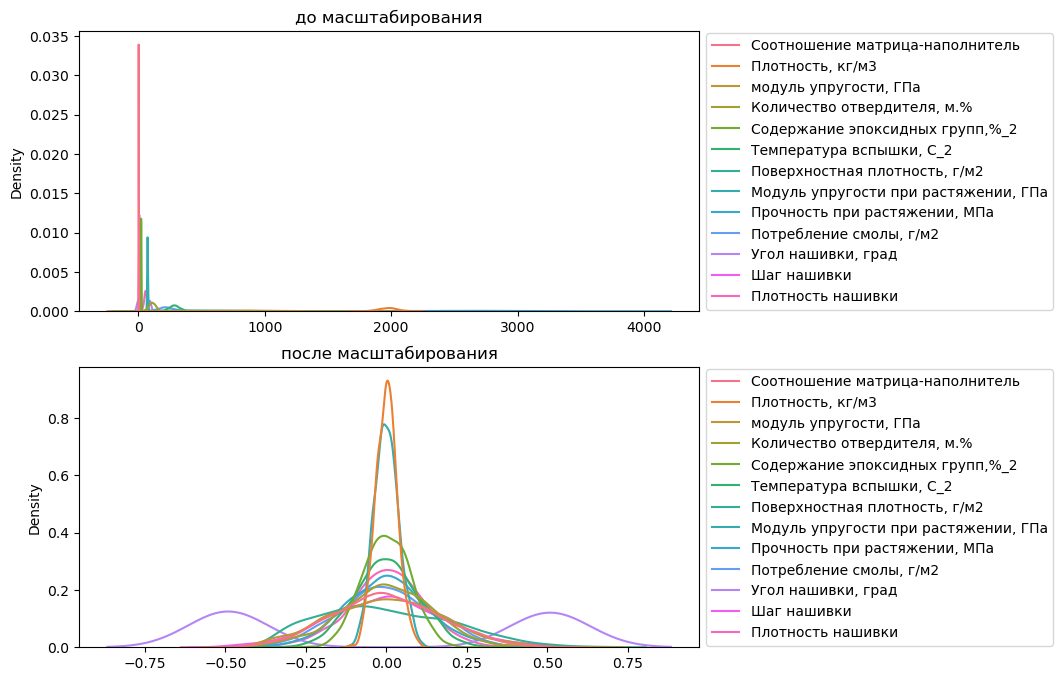

In [17]:
draw_kde(full_col_list, data_, data_abs_scaled, 'до масштабирования', 'после масштабирования')

### ЭКСПЕРИМЕНТ: ниже проводится эксперимент масштабирования признаков всеми выше рассмотренными способами в выборке с целевой переменной "Модуль упругости при растяжении". 

## Обучение моделей с различными вариантами масштабирования признаков

In [18]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = pd.DataFrame(
                    {'metric': pd.Series([metric], dtype='str'),
                    'alg': pd.Series([alg], dtype='str'),
                    'value': pd.Series([value], dtype='float')})
        self.df = pd.concat([self.df, temp])

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=True)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending=True)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        plt.bar_label(rects, label_type = 'center')
        ax1.set_title(str_header)
        #for a, b in zip(pos, array_metric):
         #   plt.text(0.5, a-0.005, str(round(b, 5)), color='black', fontsize=12, # ha='center', va='center',
          #            transform=ax1.transAxes) # 0.5, a-0.05, 
        plt.show()   

In [19]:
data_dict_full =   {'Original': (data_),
                    'StandardScaler': (data_std_scaled), 
                    'MeanNormalisation': (data_mean_scaled),
                    'MinMaxScaler': (data_minmax_scaled), 
                    'RobustScaler': (data_robust_scaled),
                    'MaxAbsScaler': (data_abs_scaled)}

In [20]:
X_data_dict        = {'Original' : [], 
                     'StandardScaler' : [],
                     'MeanNormalisation' : [],
                     'MinMaxScaler' : [],
                    'RobustScaler' : [],
                     'MaxAbsScaler' : []}

In [21]:
y_data_dict       = {'Original' : [], 
                     'StandardScaler' : [],
                     'MeanNormalisation' : [],
                     'MinMaxScaler' : [],
                    'RobustScaler' : [],
                     'MaxAbsScaler' : []}

In [29]:
# Разделим выборку на обучающую и тестовую
for key in data_dict_full.keys():
    x = data_dict_full[key]
    y = x.pop('Модуль упругости при растяжении, ГПа')
    X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                             test_size=0.3,
                                                             random_state=7)
    X_data_dict[key].append([X_train])
    X_data_dict[key].append([X_test])
    y_data_dict[key].append([y_train])
    y_data_dict[key].append([y_test])

In [51]:
# словарь моделей
clas_models_dict = {'LinR': LinearRegression(), 
                    'SVR(rbf)': SVR(kernel='rbf'),
                    'KNN_5': KNeighborsRegressor(n_neighbors=5),
                    'Tree': DecisionTreeRegressor(random_state=7),
                    'GB': GradientBoostingRegressor(random_state=7),
                    'RF': RandomForestRegressor(n_estimators=100, random_state = 7),
                    'Lasso' : Lasso(random_state = 7),
                    'ElNet' : ElasticNet(random_state = 7), 
                    'Rdg' : Ridge(random_state = 7)}

In [52]:
def test_models(clas_models_dict, X_data_dict, y_data_dict):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name in X_data_dict.keys():
            
            X_train, X_test = X_data_dict[data_name]
            
            X_train = np.reshape(X_train, (716, 12))  
            X_test = np.reshape(X_test, (307, 12))
                
            y_train, y_test = y_data_dict[data_name]
                
            y_train = np.reshape(y_train, (716, ))  
            y_test = np.reshape(y_test, (307, ))
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            logger.add(model_name, data_name, r2)
            
    return logger

In [109]:
#def test_models(clas_models_dict, X_data_dict, y_train, y_test):
    
#    logger = MetricLogger()
    
#    for model_name, model in clas_models_dict.items():
        
#        for data_name in X_data_dict.keys():
            
#            X_train, X_test = X_data_dict[data_name]
            
#            X_train = np.reshape(X_train, (716, 12))  
#            X_test = np.reshape(X_test, (307, 12))
              
#            model.fit(X_train, y_train)
#            y_pred = model.predict(X_test)
#            r2 = r2_score(y_test, y_pred)
#            logger.add(model_name, data_name, r2)
            
#    return logger

In [56]:
%%time
logger = test_models(clas_models_dict, X_data_dict, y_data_dict)

CPU times: total: 12.7 s
Wall time: 12.5 s


In [61]:
clas_models_dict

{'LinR': LinearRegression(),
 'SVR(rbf)': SVR(),
 'KNN_5': KNeighborsRegressor(),
 'Tree': DecisionTreeRegressor(random_state=7),
 'GB': GradientBoostingRegressor(random_state=7),
 'RF': RandomForestRegressor(random_state=7),
 'Lasso': Lasso(random_state=7),
 'ElNet': ElasticNet(random_state=7),
 'Rdg': Ridge(random_state=7)}

In [63]:
for i in clas_models_dict:
    print(i)

LinR
SVR(rbf)
KNN_5
Tree
GB
RF
Lasso
ElNet
Rdg


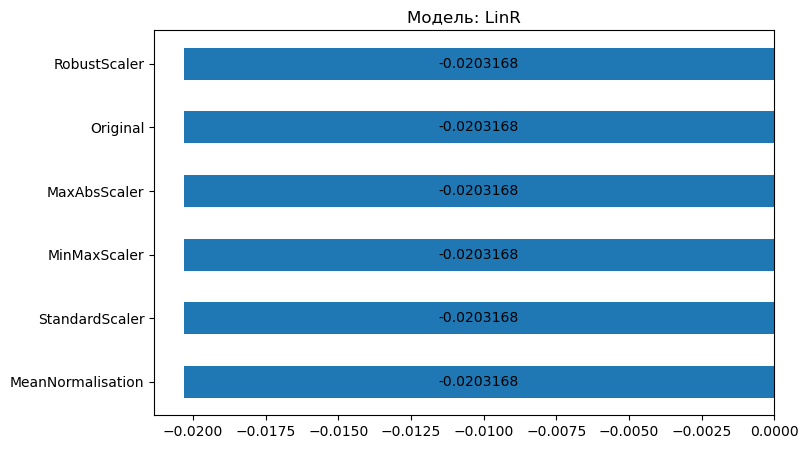

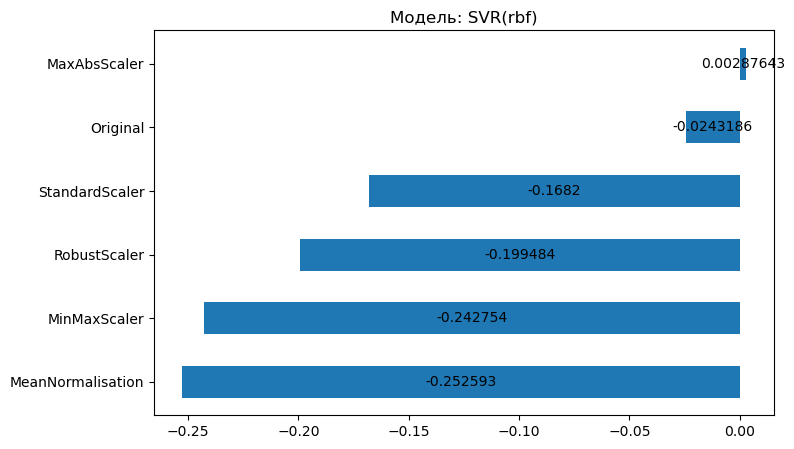

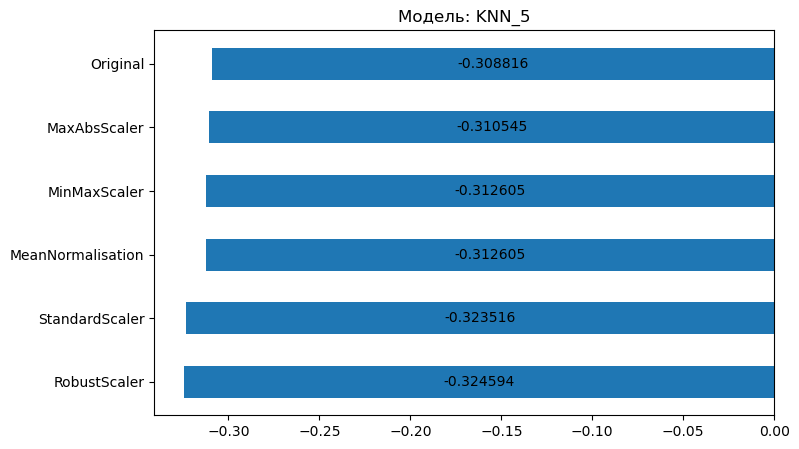

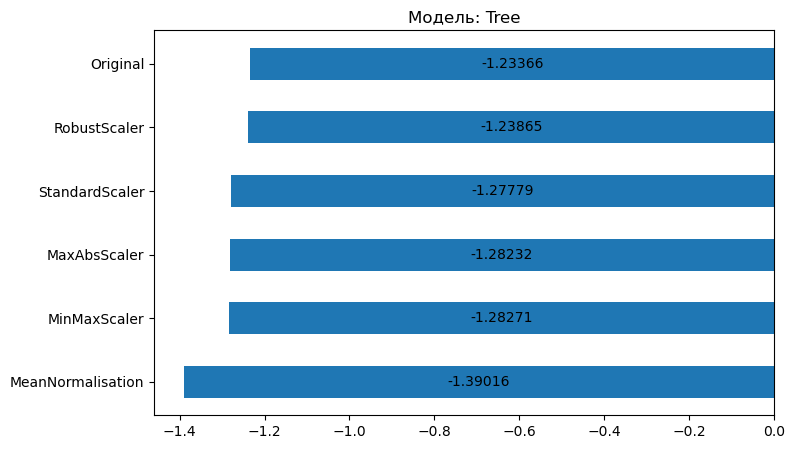

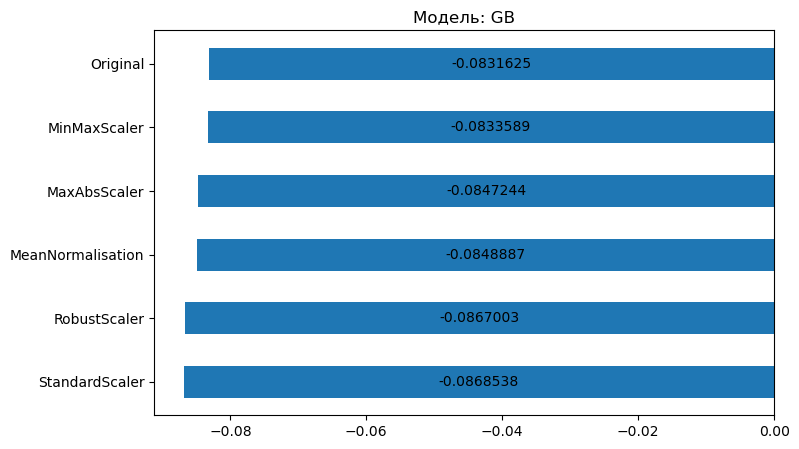

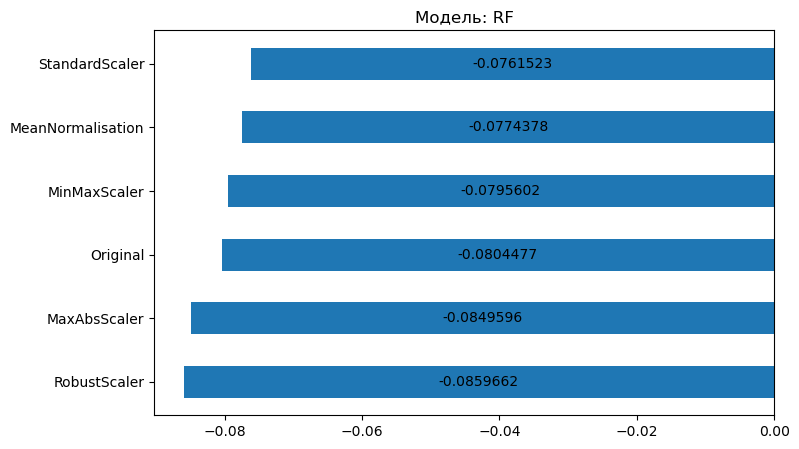

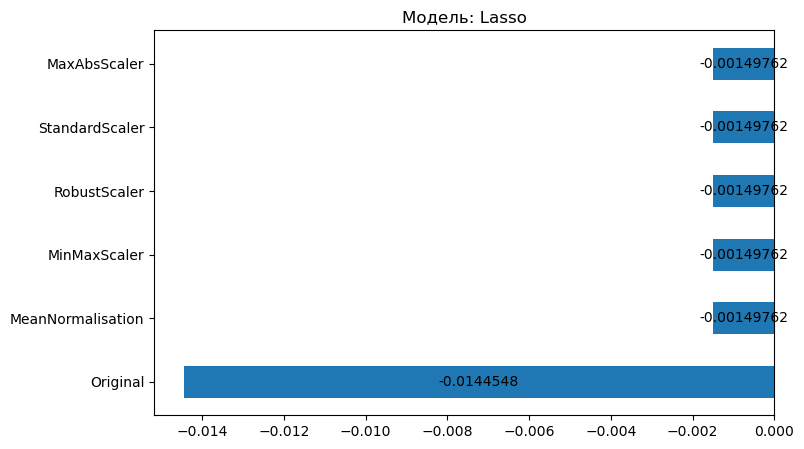

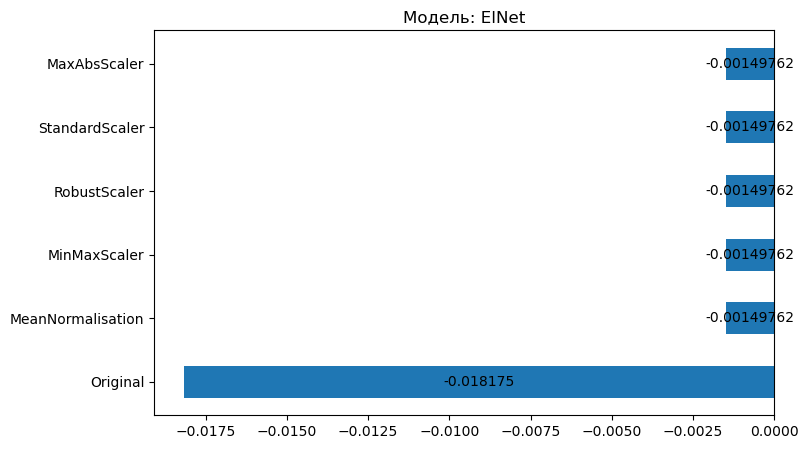

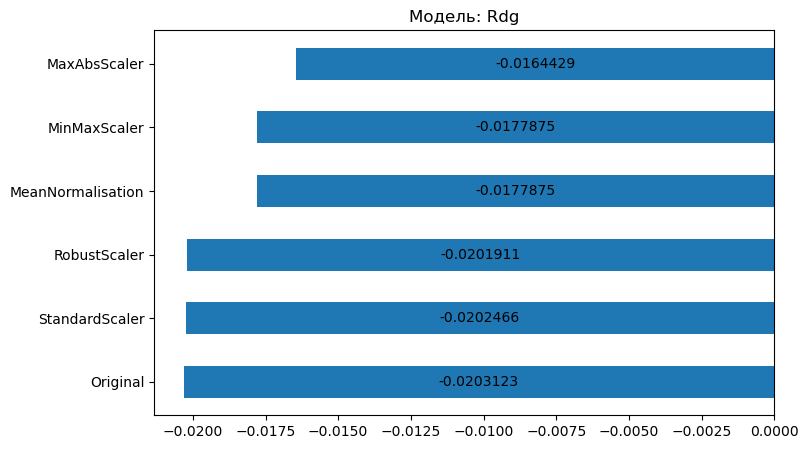

In [64]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(8, 5))

In [65]:
# сведем полученные результаты в таблицу по метрике качества - средняя абсолютная ошибка
r2_list = []
for model_name, model in clas_models_dict.items():
        
    for data_name in X_data_dict.keys():
            
        X_train, X_test = X_data_dict[data_name]
            
        X_train = np.reshape(X_train, (716, 12))  
        X_test = np.reshape(X_test, (307, 12))
        
        y_train, y_test = y_data_dict[data_name]
                
        y_train = np.reshape(y_train, (716, ))  
        y_test = np.reshape(y_test, (307, ))
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_list.append([model_name, data_name, r2])

In [66]:
# из списка сделаем датафрейм и отсортируем по возрастанию значения метрики 
R_2 = pd.DataFrame(r2_list, columns = ['model_name', 'data_name', 'r2'])
R_2 = R_2.sort_values(by=['r2'], ascending=False)
index_r2 = range(1, 55)
R_2 = R_2.set_axis(index_r2, axis='index')
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
R_2

,model_name,data_name,r2
1,SVR(rbf),MaxAbsScaler,0.002876
2,Lasso,StandardScaler,-0.001498
3,Lasso,MaxAbsScaler,-0.001498
4,ElNet,StandardScaler,-0.001498
5,ElNet,MaxAbsScaler,-0.001498
6,ElNet,RobustScaler,-0.001498
7,Lasso,MinMaxScaler,-0.001498
8,Lasso,RobustScaler,-0.001498
9,ElNet,MinMaxScaler,-0.001498
10,ElNet,MeanNormalisation,-0.001498


#### ПРОМЕЖУТОЧНЫЙ ВЫВОД: Из таблицы видно, что произошла градация моделей по метрике R2 после масштабирования разными способами, а не самих методов масштабирования. Лучшие модели сходятся к нулю по данной метрике. Модель 'Decision Tree' показывает неконкурентные результаты в сравнении с другими моделями при всех рассмотренных вариантах масштабирования. Отметим группировку вверху таблицы моделей линейной регресии, включая результат работы с оригинальными (неотмасштабированные) данными (модель 'Lasso' - 12 позиция), с коэффициентом детерминации близким к нулю.   